## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

# 1. Download a small (5-15) set of variables of interest.

Done

# 2. Write a short description of the data you chose, and why. (1 page)

The data I chose contains 11 variables (13 before dropping unnecessary variables). The variables are as follows: year, wrkstat, sibs, childs, age, degree, major1, income, partyid, relig, and hapmar. These variables refer to the year the response comes from, the working status of the respondent, the number of siblings the respondent has, the number of children the respondent has, the age of the respondent, the type of degree the respondent has/doesn’t have, the major of the respondent if they have one, which of the selected income brackets the respondent is in, the party preference of the respondent, the religion of the respondent, and the degree of happiness of their marriage (if applicable). The primary purpose of selecting this dataset is to analyze the lives of people based on their religion. Religious beliefs and practices vary greatly in the United States, and I’d like to understand how people’s lives differ based on their religion, and determine whether people of certain religions appear to have more or less success/accomplishment in different aspects of life.  This includes the working status of respondents, and whether there are significant differences in working status between religions. Likewise, this dataset can be used to determine the extent of education in each religion, which could reflect socioeconomic factors and/or religious beliefs that encourage/prevent educational advancement. The same goes for income, as the distribution of income within each religion can be used to show whether certain religions are disproportionately richer/poorer than others. This data also allows for analysis of demographic features within religions. For example, the age distribution within each religion can be examined, as well as the number of children people of each religion have. Marriage happiness can also be broken down by religion in order to see whether marriages within certain religions are typically more or less happy than others. Lastly, political preference can be examined within each religious group.


This is 1 page Times New Roman - Double Spaced - Font Size 12

# 3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.

In [528]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [529]:
# 3

df = pd.read_csv("./GSS.csv")

#for col in df.columns:
#    print(df[col].apply(type).value_counts(), "\n")

# year --> int -- Fine as is
# id_ --> int -- Fine as is --> Drop, pointless
# wrkstat --> str -- Reformat answers
# occ --> Coded, can't find conversion to actual jobs --> Drop
# sibs --> int
# childs --> int
# age --> int
# degree --> str -- Ensure correct categories
# major1 --> str -- Ensure correct categories
# income --> float or better strings
# relig --> str -- Ensure correct categories
# partyid --> str -- Ensure correct categories
# hapmar --> str -- Ensure correct categories

# Dropping id_. Mostly pointless column
df = df.drop(columns = "id_")

# Cleaning wrkstat. Changing the variety of unknown answers into a single unknown. The rest of the answers are acceptable
df["wrkstat"] = df['wrkstat'].apply(lambda x: "Unknown" if x in (".n:  No answer", ".s:  Skipped on Web", ".d:  Do not Know/Cannot Choose") else x)
df["wrkstat"] = df["wrkstat"].replace("Unemployed, laid off, looking for work", "Unemployed")
df["wrkstat"] = df["wrkstat"].replace("With a job, but not at work because of temporary illness, vacation, strike", "Employed, but not at work")

# Dropping occ column, values can't be deciphered without immense work that I don't want to do
df = df.drop(columns = "occ")

# Cleaning sibs. Only thing that needs to change is converting strings to numerics and getting rid of answers like "I dont know"
df["sibs"] = pd.to_numeric(df["sibs"], errors = "coerce")

# Cleaning childs. Same as sibs
df["childs"] = pd.to_numeric(df["childs"], errors = 'coerce')

# Cleaning age. Same as sibs and childs
df["age"] = pd.to_numeric(df["age"], errors = 'coerce')

# Cleaning degree. Answers are fine, just putting all unknowns into a single unknown like with wrkstat
df["degree"] = df['degree'].apply(lambda x: "Unknown" if x in (".n:  No answer", ".s:  Skipped on Web", ".d:  Do not Know/Cannot Choose") else x)

# Cleaning major1. Putting inapplicable and unavailable into 1 value.
df["major1"] = df["major1"].apply(lambda x: "Inapplicable/Unavailable" if x in (".i:  Inapplicable", ".y:  Not available in this year") else x)

# Cleaning income. Converting any of the entries that are not money ranges (ie. $10,000 to $20,000) into Unknown
df["income"] = df["income"].apply(lambda x: x if '$' in x else "Unknown")

# Cleaning relig. Same as income, but for religions
df["relig"] = df['relig'].apply(lambda x: x if x in ('Jewish', 'Catholic', 'Protestant', 
                                                     'Other', 'Inter-nondenominational', 
                                                     'Christian', 'Muslim/islam', 'Buddhism',
                                                     'Orthodox-christian', 'Native american',
                                                     'Hinduism', 'Other eastern religions')
                                                     else "Unknown")

# Cleaning partyid. Converting independents with preference to just independent. Changing name of not very strong _ to lean _. Putting all unknowns into a single unknown
df["partyid"] = df["partyid"].replace("Independent (neither, no response)", "Independent")
df["partyid"] = df["partyid"].replace("Independent, close to democrat", "Slight lean democrat")
df["partyid"] = df["partyid"].replace("Independent, close to republican", "Slight lean republican")
df["partyid"] = df["partyid"].replace("Not very strong democrat", "Lean democrat")
df["partyid"] = df["partyid"].replace("Not very strong republican", "Lean republican")
df["partyid"] = df['partyid'].apply(lambda x: "Unknown" if x in (".n:  No answer", ".d:  Do not Know/Cannot Choose") else x)


# Cleaning hapmar. Changing name of Inapplicable response. Putting all unknowns into a single unknown.
df["hapmar"] = df["hapmar"].replace(".i:  Inapplicable", "Inapplicable")
df["hapmar"] = df["hapmar"].apply(lambda x: "Unknown" if x in (".n:  No answer", ".s:  Skipped on Web", ".d:  Do not Know/Cannot Choose") else x)

df.head()

,year,wrkstat,sibs,childs,age,degree,major1,income,partyid,relig,hapmar
0,1972,Working full time,3.0,0.0,23.0,Bachelor's,Inapplicable/Unavailable,Unknown,Slight lean democrat,Jewish,Inapplicable
1,1972,Retired,4.0,5.0,70.0,Less than high school,Inapplicable/Unavailable,Unknown,Lean democrat,Catholic,Inapplicable
2,1972,Working part time,5.0,4.0,48.0,High school,Inapplicable/Unavailable,Unknown,Independent,Protestant,Inapplicable
3,1972,Working full time,5.0,0.0,27.0,Bachelor's,Inapplicable/Unavailable,Unknown,Lean democrat,Other,Inapplicable
4,1972,Keeping house,2.0,2.0,61.0,High school,Inapplicable/Unavailable,Unknown,Strong democrat,Protestant,Inapplicable


# 4. Produce some numeric summaries and visualizations. (1-3 pages)

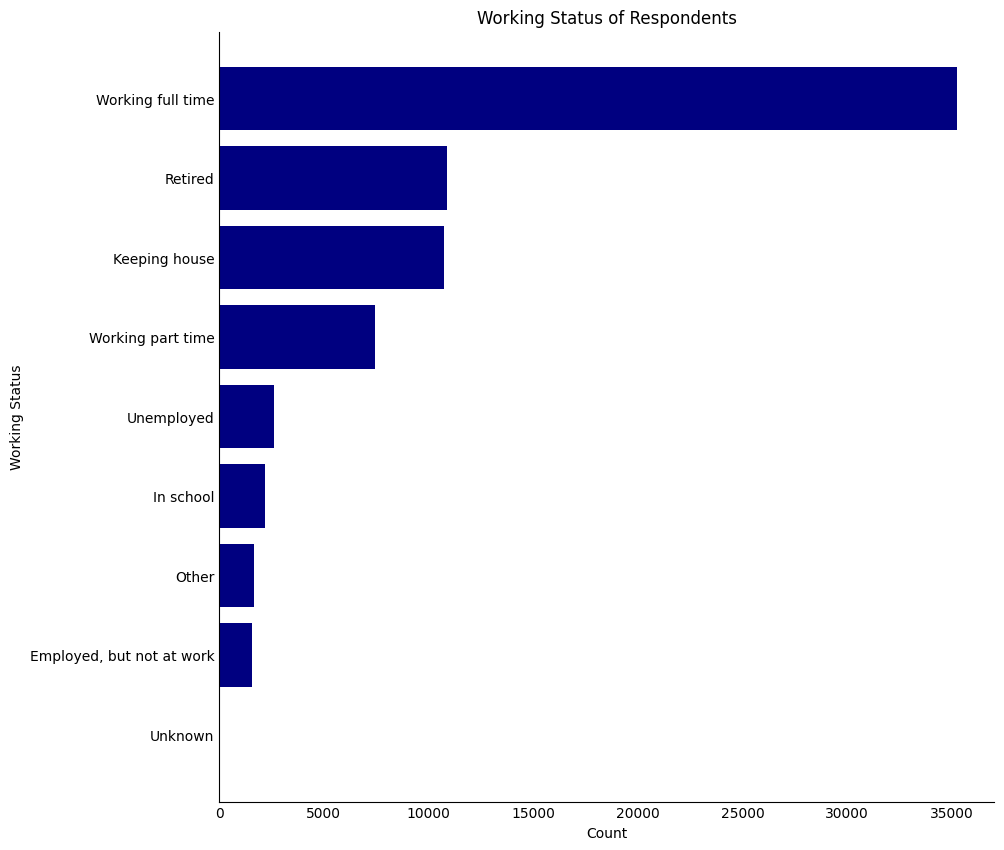

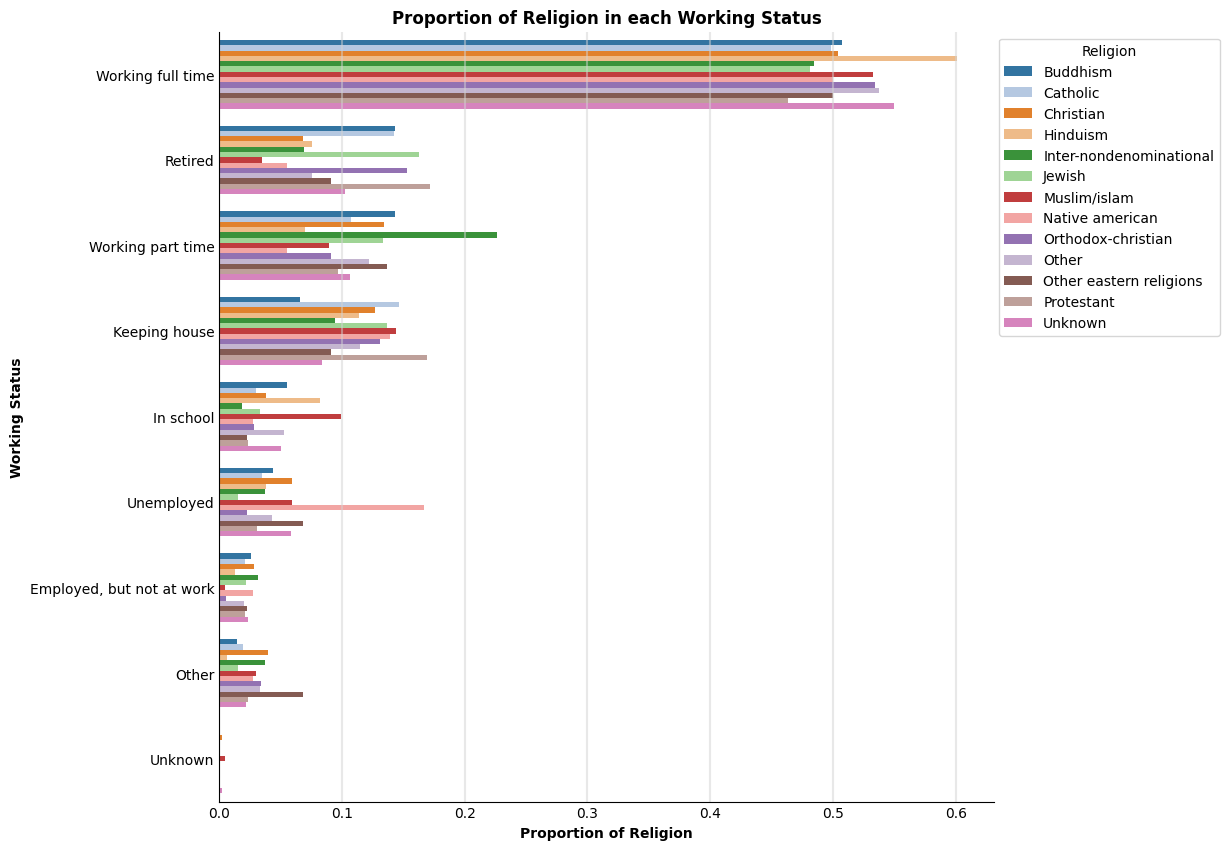

In [530]:
plt.figure(figsize = (10, 10))
plt.barh(df["wrkstat"].value_counts().iloc[::-1].index, df["wrkstat"].value_counts().iloc[::-1].values, color = "navy")
plt.xlabel("Count")
plt.ylabel("Working Status")
plt.gca().tick_params(axis = 'both', length = 0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title("Working Status of Respondents")
plt.show()


df_prop = df.groupby("relig")["wrkstat"].value_counts(normalize = True).rename("proportion").reset_index()

plt.figure(figsize = (10, 10))
sns.barplot(data = df_prop, y = "wrkstat", x = "proportion", hue = "relig", palette = "tab20")

plt.xlabel("Proportion of Religion", weight = 'bold')
plt.ylabel("Working Status", weight = 'bold')
plt.title("Proportion of Religion in each Working Status", weight = 'bold')

sns.despine(top = True, right = True)
plt.gca().tick_params(axis = 'both', length = 0)
plt.grid(color = "lightgray", alpha = 0.5, axis = 'x', linewidth = 1.5)

plt.legend(loc = "upper right", bbox_to_anchor = (1.3, 1), title = "Religion")
plt.show()

In [531]:
# Age description
df.groupby("relig")['age'].describe().sort_values(by = 'mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
relig,,,,,,,,
Jewish,1393.0,50.442929,17.917269,18.0,35.0,50.0,65.00,88.0
Protestant,39542.0,48.279728,17.560573,18.0,33.0,47.0,62.00,88.0
Orthodox-christian,174.0,48.063218,16.108789,19.0,35.0,46.0,60.75,84.0
Buddhism,267.0,46.479401,17.237683,18.0,33.0,43.0,58.50,88.0
Other eastern religions,43.0,46.302326,14.490613,18.0,39.5,47.0,52.00,79.0
Catholic,17016.0,45.518218,17.206222,18.0,31.0,43.0,59.00,88.0
Native american,36.0,42.444444,15.668794,19.0,29.5,42.0,51.75,76.0
Inter-nondenominational,158.0,41.474684,14.941798,19.0,30.0,38.0,49.75,82.0
Christian,977.0,41.316274,13.896104,18.0,31.0,39.0,51.00,88.0


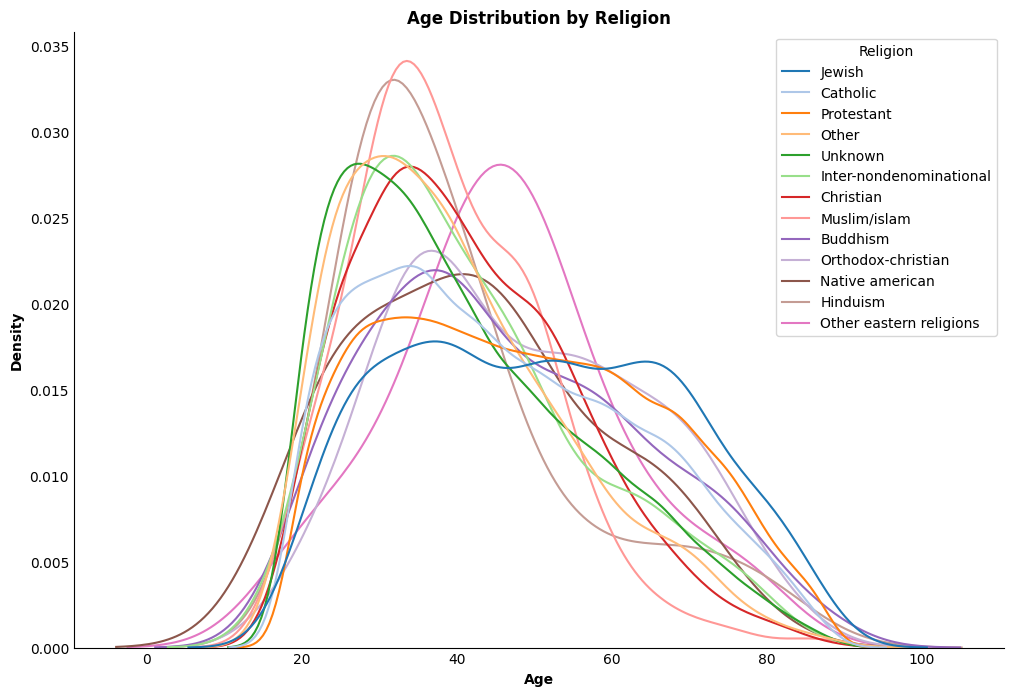

In [532]:
plt.figure(figsize = (12, 8))
kde = sns.kdeplot(data = df, x = 'age', hue = 'relig', palette = "tab20", common_norm = False)
sns.despine(top = True, right = True)
plt.gca().tick_params(axis = 'both', length = 0)
sns.move_legend(kde, loc = 'upper right', title = "Religion")
plt.title("Age Distribution by Religion", weight = 'bold')
plt.xlabel("Age", weight = 'bold')
plt.ylabel("Density", weight = 'bold')
plt.show()

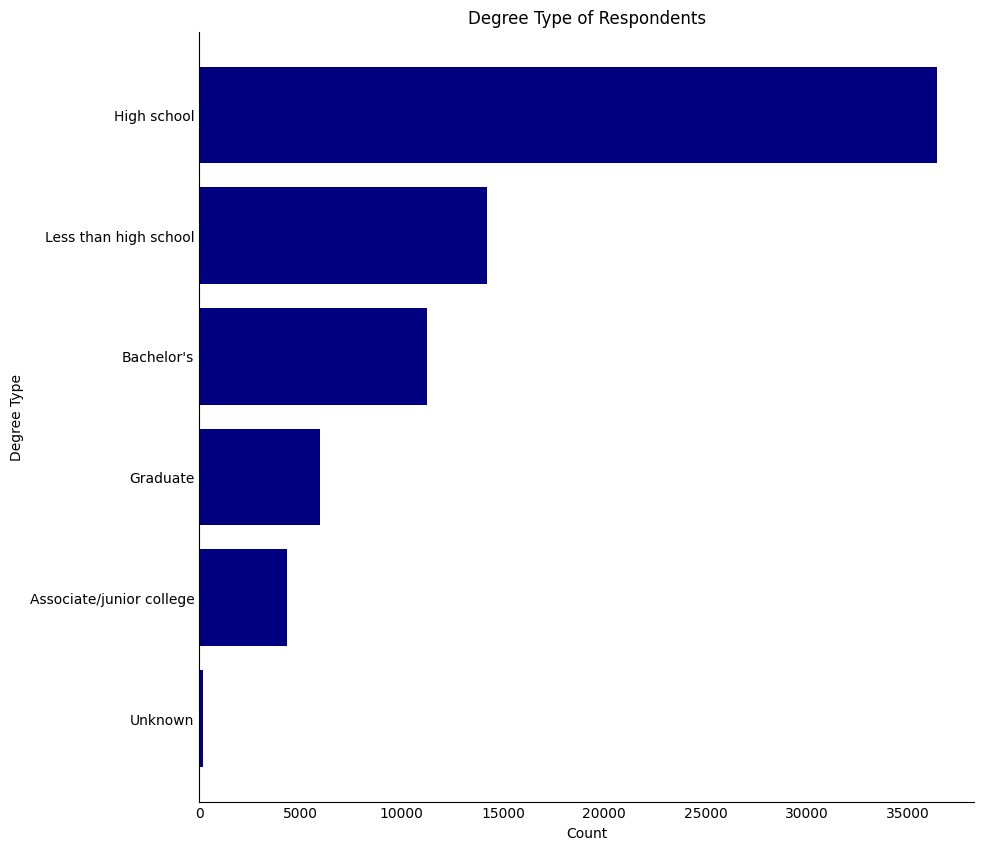

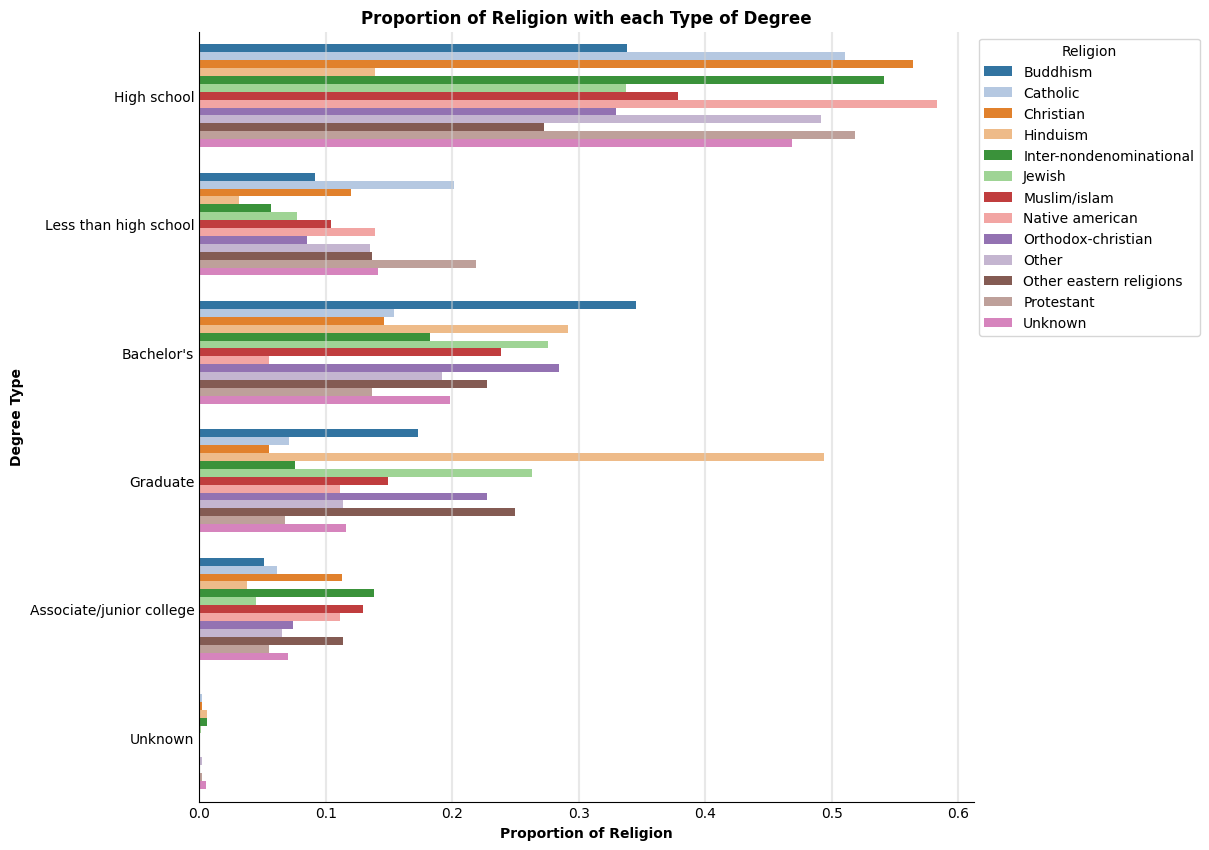

In [533]:
plt.figure(figsize = (10, 10))
plt.barh(df["degree"].value_counts().iloc[::-1].index, df["degree"].value_counts().iloc[::-1].values, color = "navy")
plt.xlabel("Count")
plt.ylabel("Degree Type")
plt.gca().tick_params(axis = 'both', length = 0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title("Degree Type of Respondents")
plt.show()


df_prop = df.groupby("relig")["degree"].value_counts(normalize = True).rename("proportion").reset_index()

plt.figure(figsize = (10, 10))
sns.barplot(data = df_prop, y = "degree", x = "proportion", hue = "relig", palette = "tab20", order = df["degree"].value_counts().index)

plt.xlabel("Proportion of Religion", weight = 'bold')
plt.ylabel("Degree Type", weight = 'bold')
plt.title("Proportion of Religion with each Type of Degree", weight = 'bold')

sns.despine(top = True, right = True)
plt.gca().tick_params(axis = 'both', length = 0)
plt.grid(color = "lightgray", alpha = 0.5, axis = 'x', linewidth = 1.5)

plt.legend(loc = "upper right", bbox_to_anchor = (1.3, 1), title = "Religion")
plt.show()

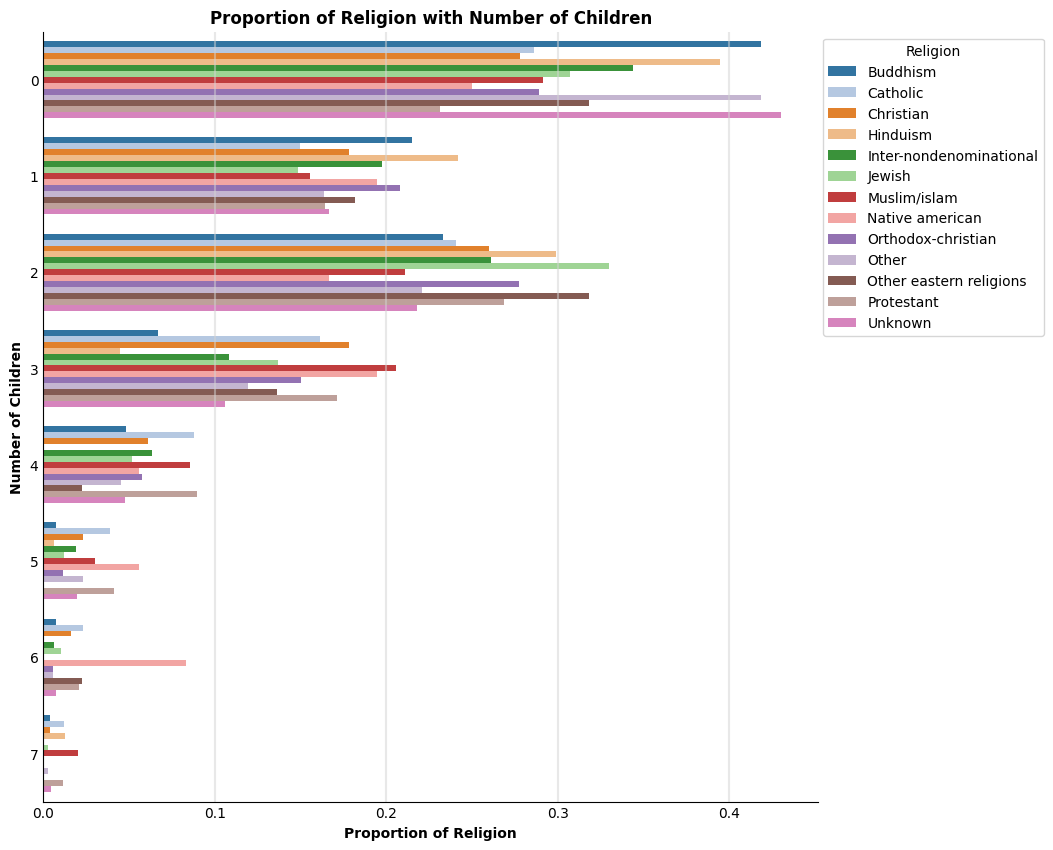

In [534]:
df['childs'] = df['childs'].apply(str)
df_childs = df[df['childs'] != 'nan']
# Copy is to get rid of weird warning:
df_childs = df_childs.copy()
df_childs['childs'] = df_childs['childs'].str.replace('.0', '', regex=False)
order = ['7', '6', '5', '4', '3', '2', '1', '0']


df_prop = df_childs.groupby("relig")["childs"].value_counts(normalize = True).rename("proportion").reset_index()
df_prop['childs'] = df_prop['childs'].str.replace('.0', '', regex=False)

plt.figure(figsize = (10, 10))
sns.barplot(data = df_prop, y = "childs", x = "proportion", hue = "relig", palette = "tab20", order = order[::-1])

plt.xlabel("Proportion of Religion", weight = 'bold')
plt.ylabel("Number of Children", weight = 'bold')
plt.title("Proportion of Religion with Number of Children", weight = 'bold')

sns.despine(top = True, right = True)
plt.gca().tick_params(axis = 'both', length = 0)
plt.grid(color = "lightgray", alpha = 0.5, axis = 'x', linewidth = 1.5)

plt.legend(loc = "upper right", bbox_to_anchor = (1.3, 1), title = "Religion")
plt.show()

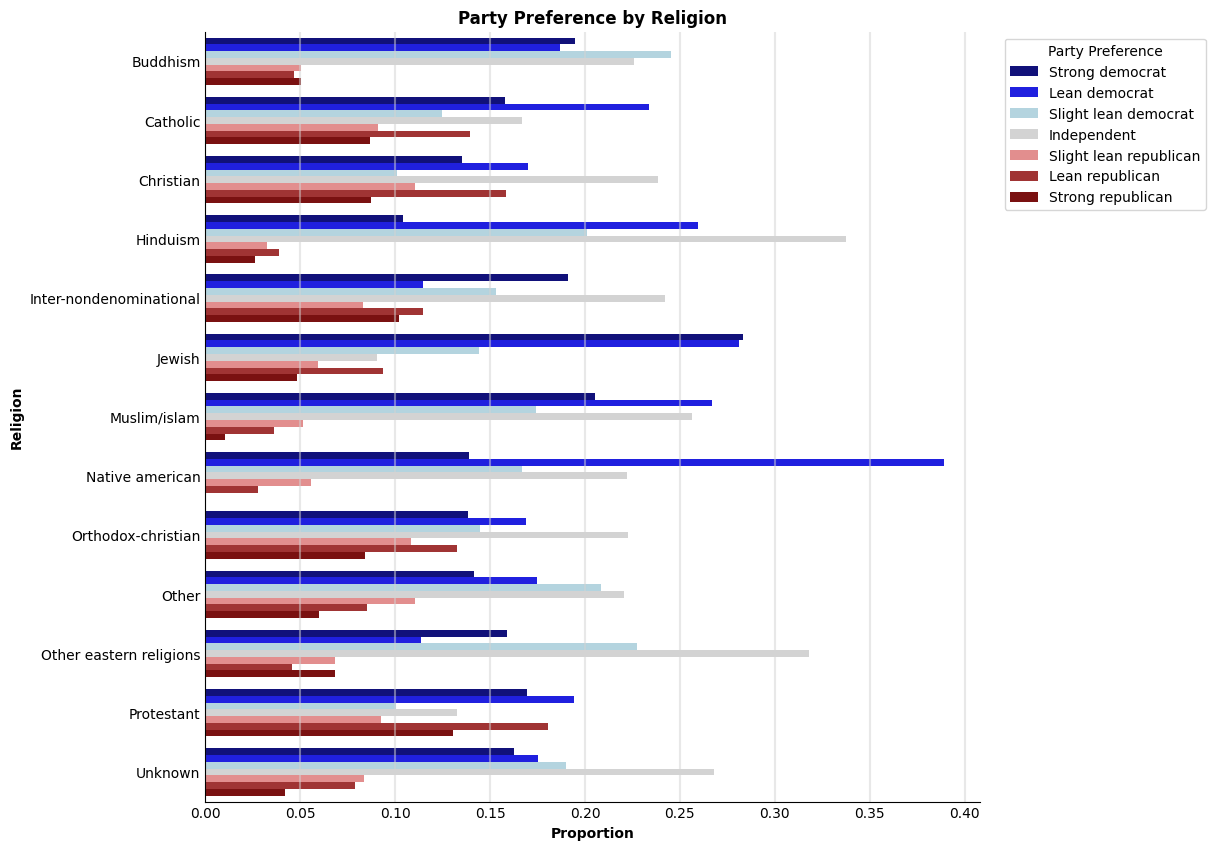

In [535]:
df_party = df[(df['partyid'] != 'Other party') & (df['partyid'] != 'Unknown')]
df_prop = df_party.groupby('relig')['partyid'].value_counts(normalize = True).rename('proportion').reset_index()
order = ["Strong democrat", "Lean democrat", "Slight lean democrat", "Independent", "Slight lean republican", "Lean republican", "Strong republican"]

plt.figure(figsize = (10, 10))

new_palette = {
    "Strong democrat": "darkblue",
    "Lean democrat": "blue",
    "Slight lean democrat": "lightblue",
    "Independent": "lightgray",
    "Slight lean republican": "lightcoral",
    "Lean republican": "firebrick",
    "Strong republican": "darkred",
}

sns.barplot(data = df_prop, y = "relig", x = "proportion", hue = "partyid", palette = new_palette, hue_order = order)

plt.xlabel("Proportion", weight = 'bold')
plt.ylabel("Religion", weight = 'bold')
plt.title("Party Preference by Religion", weight = 'bold')

sns.despine(top = True, right = True)
plt.gca().tick_params(axis = 'both', length = 0)
plt.grid(color = "lightgray", alpha = 0.5, axis = 'x', linewidth = 1.5)

plt.legend(loc = "upper right", bbox_to_anchor = (1.3, 1), title = "Party Preference")
plt.show()


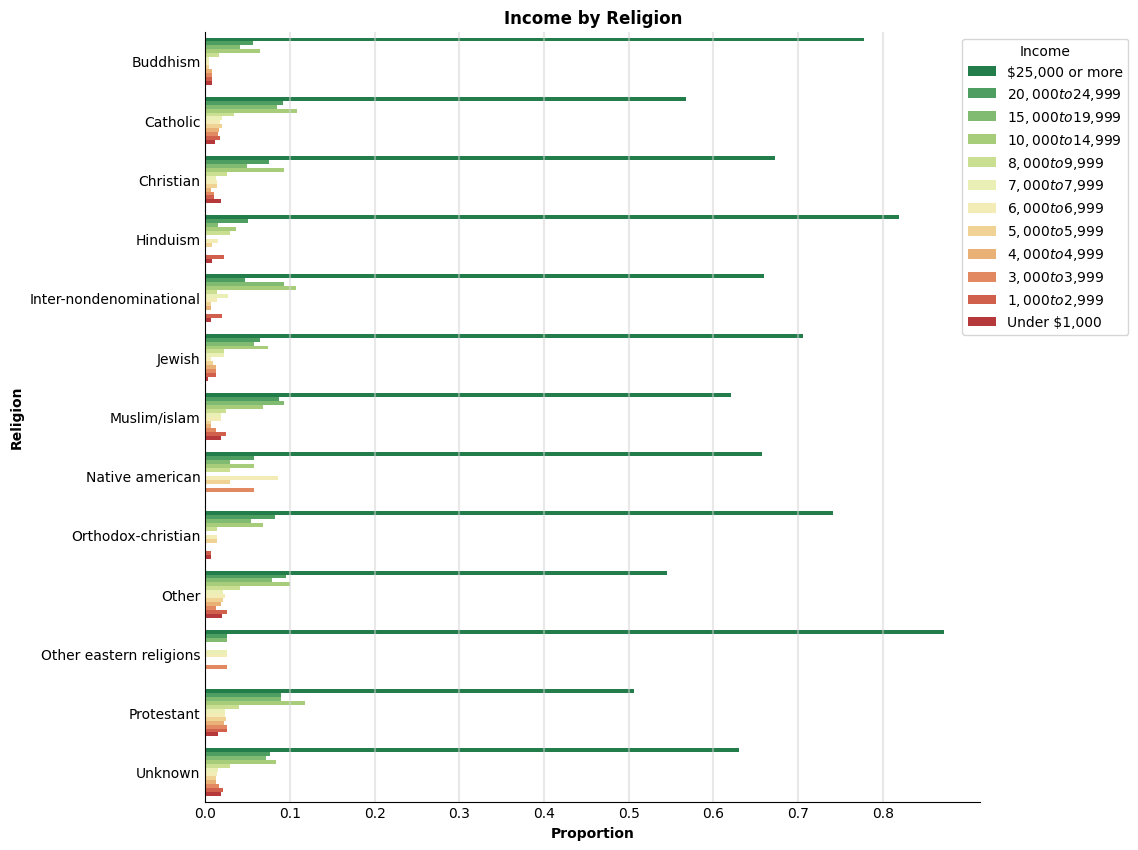

In [536]:
df_income = df[df['income'] != 'Unknown']
df_prop = df_income.groupby('relig')['income'].value_counts(normalize = True).rename('proportion').reset_index()
order = ['$25,000 or more', '$20,000 to $24,999', '$15,000 to $19,999', 
 '$10,000 to $14,999', '$8,000 to $9,999', '$7,000 to $7,999', 
 '$6,000 to $6,999', '$5,000 to $5,999', '$4,000 to $4,999', 
 '$3,000 to $3,999', '$1,000 to $2,999', 'Under $1,000']
plt.figure(figsize = (10, 10))

sns.barplot(data = df_prop, y = "relig", x = "proportion", hue = "income", hue_order = order, palette = "RdYlGn_r")

plt.xlabel("Proportion", weight = 'bold')
plt.ylabel("Religion", weight = 'bold')
plt.title("Income by Religion", weight = 'bold')

sns.despine(top = True, right = True)
plt.gca().tick_params(axis = 'both', length = 0)
plt.grid(color = "lightgray", alpha = 0.5, axis = 'x', linewidth = 1.5)

plt.legend(loc = "upper right", bbox_to_anchor = (1.2, 1), title = "Income")
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
plt.show()


hapmar
VERY HAPPY       21427
PRETTY HAPPY     11506
NOT TOO HAPPY     1066
Name: count, dtype: int64


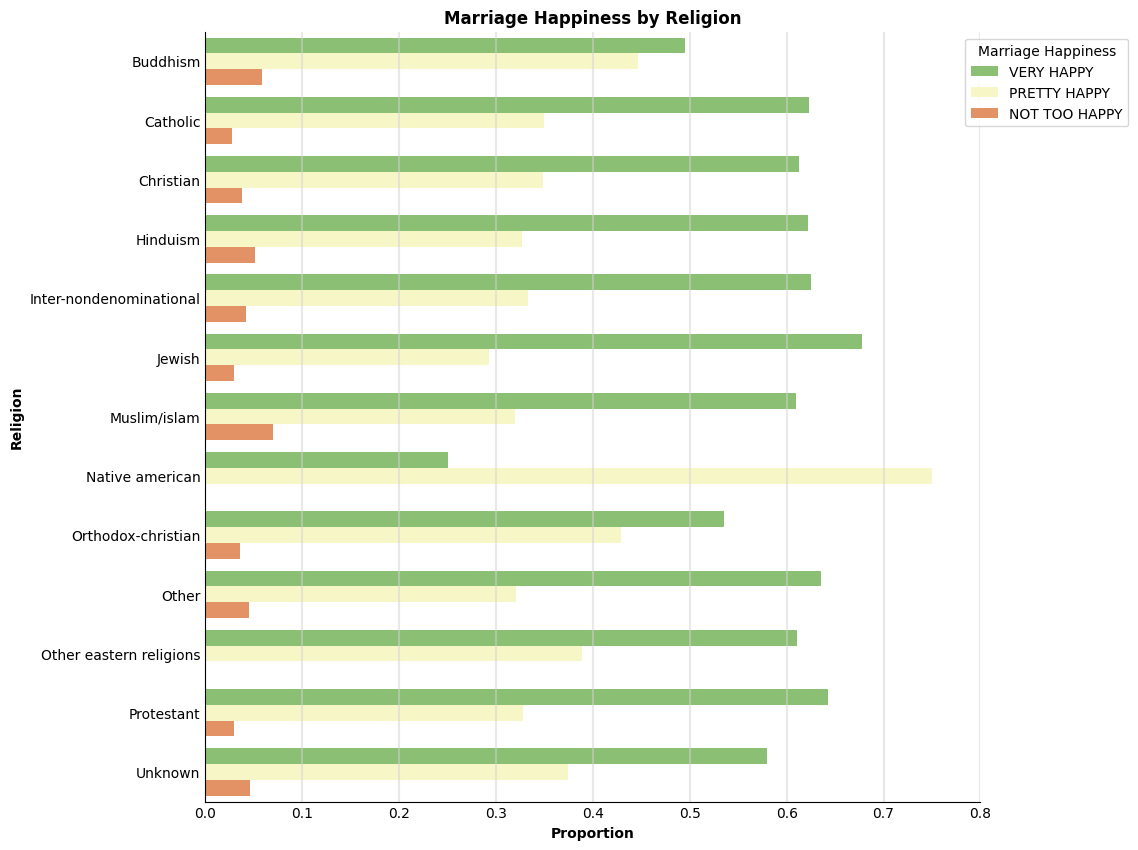

In [537]:
df_married = df[(df['hapmar'] != "Inapplicable") & (df['hapmar'] != "Unknown")]
print(df_married["hapmar"].value_counts())

df_prop = df_married.groupby('relig')['hapmar'].value_counts(normalize = True).rename('proportion').reset_index()

order = ["VERY HAPPY", "PRETTY HAPPY", "NOT TOO HAPPY"]

plt.figure(figsize = (10, 10))

sns.barplot(data = df_prop, y = "relig", x = "proportion", hue = "hapmar", hue_order = order, palette = "RdYlGn_r")

plt.xlabel("Proportion", weight = 'bold')
plt.ylabel("Religion", weight = 'bold')
plt.title("Marriage Happiness by Religion", weight = 'bold')

sns.despine(top = True, right = True)
plt.gca().tick_params(axis = 'both', length = 0)
plt.grid(color = "lightgray", alpha = 0.5, axis = 'x', linewidth = 1.5)

plt.legend(loc = "upper right", bbox_to_anchor = (1.2, 1), title = "Marriage Happiness")
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
plt.show()


# 5. Describe your findings in 1-2 pages.

The first thing I looked at was the working status by religion. Looking at working status as a whole, full-time work was the overwhelming plurality, followed by retired, keeping house, and working part time. Breaking it down by religion, differences became quickly apparent. Hinduism had a significantly higher proportion of respondents working full time, around 0.6, with the other religions falling around 0.5. Interestingly, a couple religions (Buddhism, Catholicism, Judaism, and Orthodox-Christian) had significantly higher retired proportions than the rest of the religions. Other aspects of working status that stood out were a much higher working part time proportion for Inter-nondenominational respondents, and a very high unemployed proportion for Native American religions. I suspect that the disproportionately high unemployment for Native American religions is a result of low employment rates on reservations. Next, I examined the age distribution of respondents for each religion. The oldest average respondent age by religion were Judaism, Protestantism, and Orthodox-Christianity, whereas the youngest were Islam, Hinduism, and Christianity. Examining the kernel density estimates for each religion showed steady rises and falls for most religions, but Judaism stood out, with a KDE that stretched fairly uniformly over the ages of ~40 to ~65, with a larger density at ages over ~60 than any other religion. I then looked at the highest education level of each religion. The first thing that stood out was the substantial advantage Hindu respondents had in the proportion of respondents with graduate degrees, nearly doubling up the next highest religion (Judaism). Hindu respondents also came in second in proportion with Bachelor’s degrees, trailing just Buddhism. I also noticed certain religions (Catholicism, Christianity, Inter-nondenominational, Native American religions, and Protestantism) had high proportions (~0.5) of respondents whose highest education level was high school. I expect this pattern arises due to the poor education typically found in rural areas where Christianity and its denominations are very common. Looking next at the number of children respondents of different religions had, the biggest takeaway was the high proportion of Native American respondents with 3+ children, with over a tenth of Native American respondents saying they had 5 or more children. Muslim respondents had a similarly high proportion of respondents with 3+ children. Based on the findings from the political preference by religion, I am led to believe the survey is somewhat flawed, seeing as every single religion had a higher proportion of democrat respondents than republican. Nonetheless, the extent of the preference differed by religion, providing some insight into the political lean of certain religious groups. Native American, Muslim, Hindu, and Jewish respondents leaned heavily democrat, with a very low proportion of respondents indicating any republican lean. Despite still having democratic leanings, the respondents from Christianity and its denominations had much higher republican proportions than most other religions. As for income, due to the nature of income brackets (all but one below 25,000 dollars), meaningful findings were hard to come by. Nonetheless, the main takeaway was that nearly half of Protestant respondents had an income below 25,000 dollars, far lower than almost every other religion. In the lower income brackets, the main takeaway is the ~ 0.7 proportion of Native American respondents in the 3000 to 3,999 dollars bracket, much higher than any other religion. Lastly, I looked at the happiness of marriages within each religion. The first thing I found was that Native American respondents chose the extremes at a very low rate, with 0 respondents saying “Not Too Happy”, while ~75% of respondents said they were “Pretty Happy” with their marriage. The rest of the religions had fairly similar responses, with the majority saying they were “Very Happy”, slightly less saying they were “Pretty Happy”, and very few saying they were “Not Too Happy”.

This is  ~2 pages Times New Roman - Double Spaced - Font Size 12